# Математическая статистика
## Практическое задание 4

В данном задании предлагается провести некоторое исследование доверительных интервалов и байесовких методов.

**Правила:**

* Выполненную работу нужно отправить на почту `probability.diht@yandex.ru`, указав тему письма `"[номер группы] Фамилия Имя - Задание 4"`. Квадратные скобки обязательны. Вместо `Фамилия Имя` нужно подставить свои фамилию и имя.
* Прислать нужно ноутбук и его pdf-версию. Названия файлов должны быть такими: `4.N.ipynb` и `4.N.pdf`, где `N` - ваш номер из таблицы с оценками.
* Никакой код из данного задания при проверке запускаться не будет.
* Некоторые задачи отмечены символом <font size="5" color="red">\*</font>. Эти задачи являются дополнительными. Успешное выполнение большей части таких задач (за все задания) является необходимым условием получения бонусного балла за практическую часть курса.
* Баллы за каждую задачу указаны далее. Если сумма баллов за задание меньше 25% (без учета доп. задач), то все задание оценивается в 0 баллов.


**Баллы за задание:**

* Задача 1 - 5 баллов
* Задача 2<font size="5" color="red">\*</font> - 3 балла
* Задача 3<font size="5" color="red">\*</font> - 3 балла
* Задача 4 - 5 баллов
* Задача 5<font size="5" color="red">\*</font> - 2 балла
* Задача 6 - 4 балла
* Задача 7 - 1 балл
* Задача 8 - 3 балла
* Задача 9<font size="5" color="red">\*</font> - 5 баллов
* Задача 10 - 5 баллов
* Задача 11<font size="5" color="red">\*</font> - 3 балла

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as sps
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF


%matplotlib inline

### 1. Доверительные интервалы

**Задача 1.** В этой задаче нужно визуализировать доверительные интервалы для выборок из различных распределений. Чтобы не плодить код, напишите следующую функцию. Пример построения есть в ячейке №22 ноутбука `python_6`.

Выборка из распределения $\mathcal{N}(0, 1)$; точный доверительный интервал минимальной длины в модели $\mathcal{N}(\theta, 1)$; нужно нанести на график точки выборки.

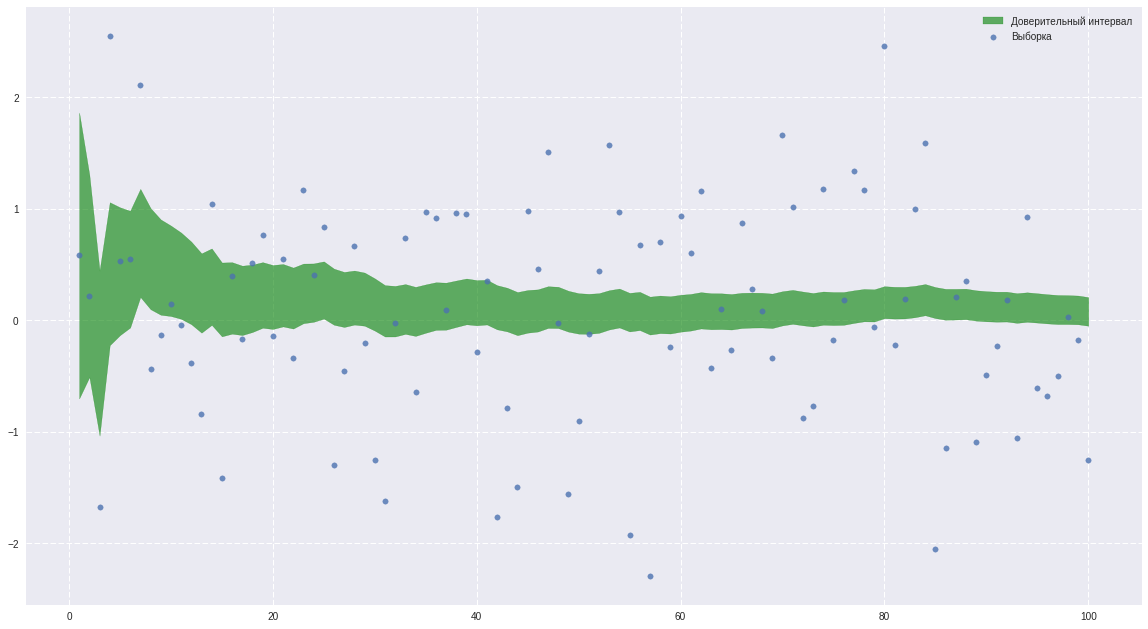

In [3]:
def draw_confidence_interval(left,  # левая граница интервала
                             right,  # правая граница интервала
                             estimation=None,  # если задана, то рисуется график оценки
                             sample=None,  # если задано, то рисуются точки выборки
                             ylim=(None, None)):  # ограничение по оси y
    plt.figure(figsize=(20, 11))
    n = np.arange(1, 101)
    plt.fill_between(n, 
                     right, 
                     left, 
                     alpha=0.6, 
                     color='g', 
                     label='Доверительный интервал')
    if sample is not None:
        plt.scatter(n, 
                    sample, 
                    alpha=0.8, 
                    s=30, 
                    label='Выборка')
    if estimation is not None:
        plt.plot(n,
                 estimation)
    plt.grid(ls='--')
    plt.legend()
    plt.show()
alpha = 0.8
sample = sps.norm(loc=0, scale=1).rvs(size=100)
left = list(map(lambda w: np.mean(sample[:w]) - sps.norm.ppf((1.0 + alpha) * 0.5) / (w ** (1/2)), 
                range(1, 101)))
right = list(map(lambda r: np.mean(sample[:r]) + sps.norm.ppf((1.0 + alpha) * 0.5) / (r ** (1/2)), 
             range(1, 101)))
draw_confidence_interval(left, right, sample=sample)

Выборка из распределения $U[0, 1]$; точный доверительный интервал минимальной длины в модели $U[0, \theta]$ на основе статистики $X_{(n)}$; нужно нанести на график точки выборки.

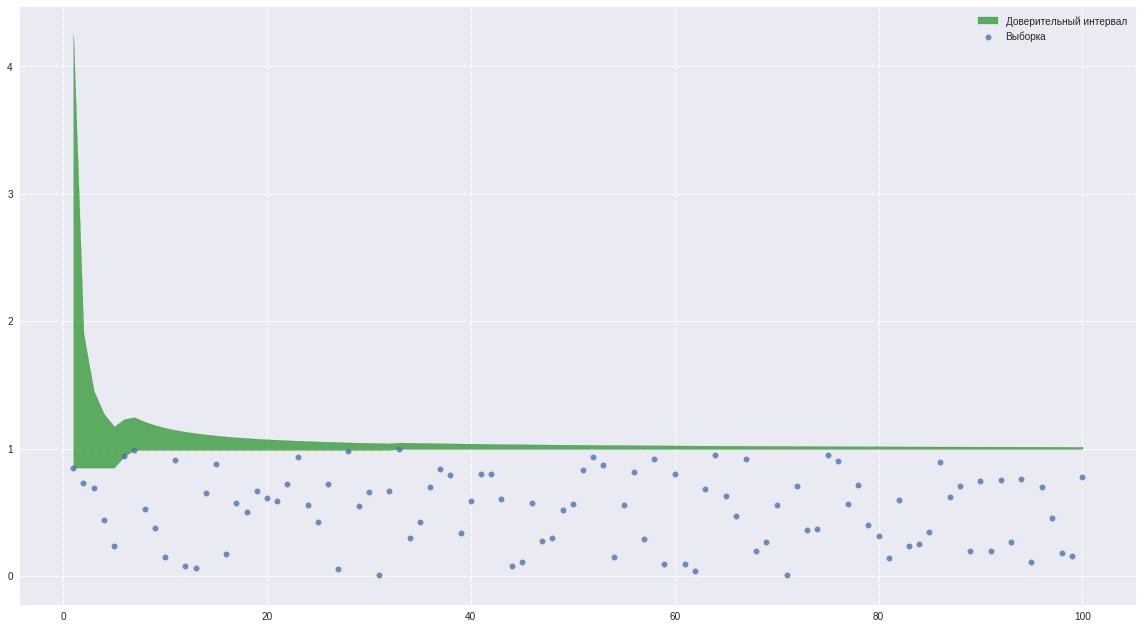

In [4]:
sample = sps.uniform.rvs(size=100)
cmax = np.maximum.accumulate(sample)
draw_confidence_interval(cmax / (-1*alpha + 1) ** (1 / np.arange(1, 101)), cmax, 
                         sample=sample, ylim=(-1, 2.1))

Выборка из распределения $\Gamma(3, 2)$; точный асимптотический доверительный интервал в модели $\Gamma(\theta, 2)$; точки выборки наносить на график не нужно

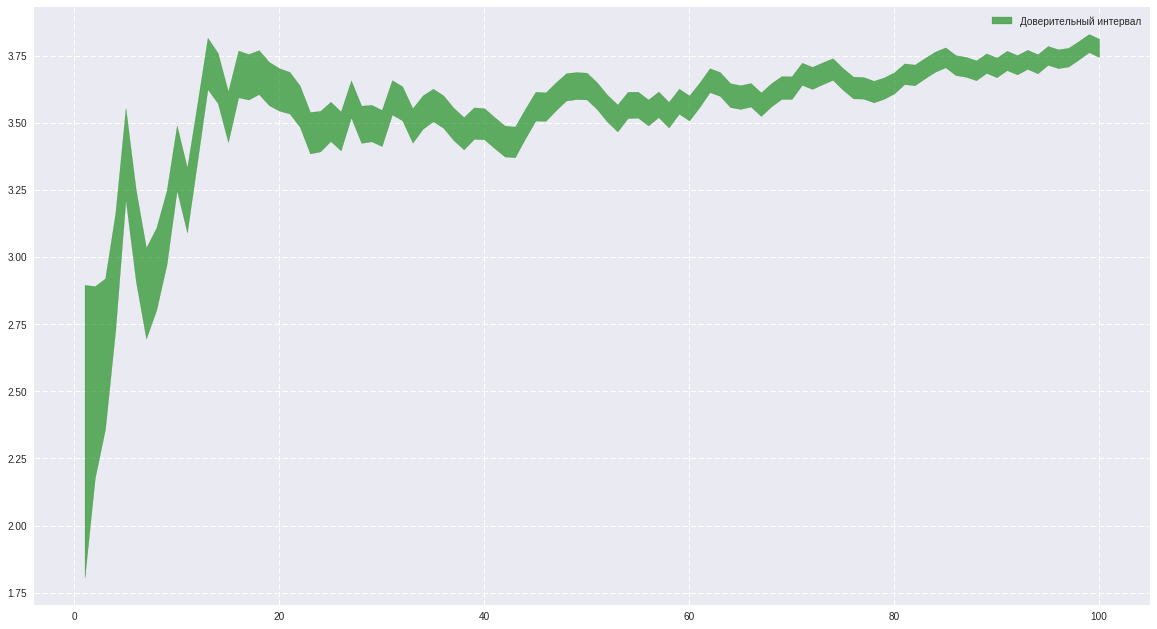

In [5]:
s = sps.gamma(a=2, scale=1/3).rvs(size=100)
cm = np.cumsum(sample) / np.arange(1, 101)
tmp1 = sps.norm.ppf((1 + alpha) / 2) * cm / ((2 * np.arange(1, 101) ** (1/2)))
tmp2 = sps.norm.ppf((1 - alpha) / 2) * cm / ((2 * np.arange(1, 101) ** (1/2)))
left = 2 / cm - tmp1
right = 2 / cm - tmp2
draw_confidence_interval(left, right, ylim=(-2, 2))


Выборка из стандартного распределения Коши; точный асимптотический доверительный интервал в модели распределения Коши со сдвигом; нужно нанести на график точки выборки.

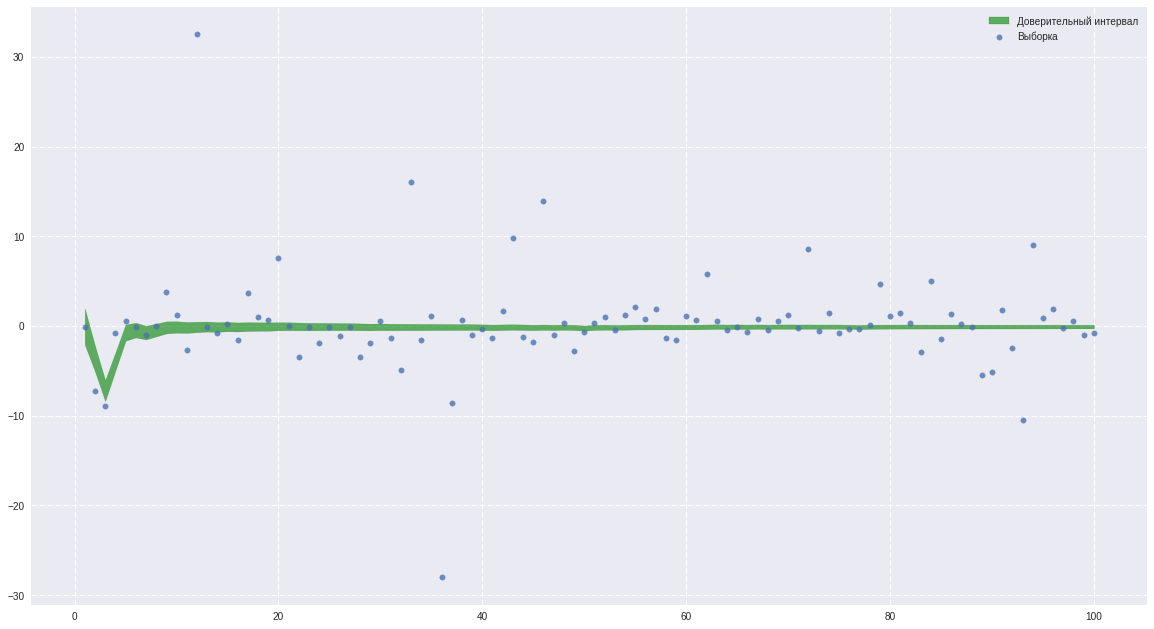

In [21]:
s = sps.cauchy.rvs(size=100)
cummedian = np.array(list(map(lambda n: np.median(sample[:n]), range(1, 101))))
left = cummedian - np.pi * sps.norm.ppf((1 + alpha) / 2) / (2 * np.sqrt(np.arange(1, 101)))
right = cummedian - np.pi * sps.norm.ppf((1 - alpha) / 2) / (2 * np.sqrt(np.arange(1, 101)))
draw_confidence_interval(left, right, sample=sample, ylim=(-1, 1))


Выборка из стандартного распределения Коши; точный доверительный интервал минимальной длины в модели $\mathcal{N}(\theta, 1)$; нужно нанести на график точки выборки.

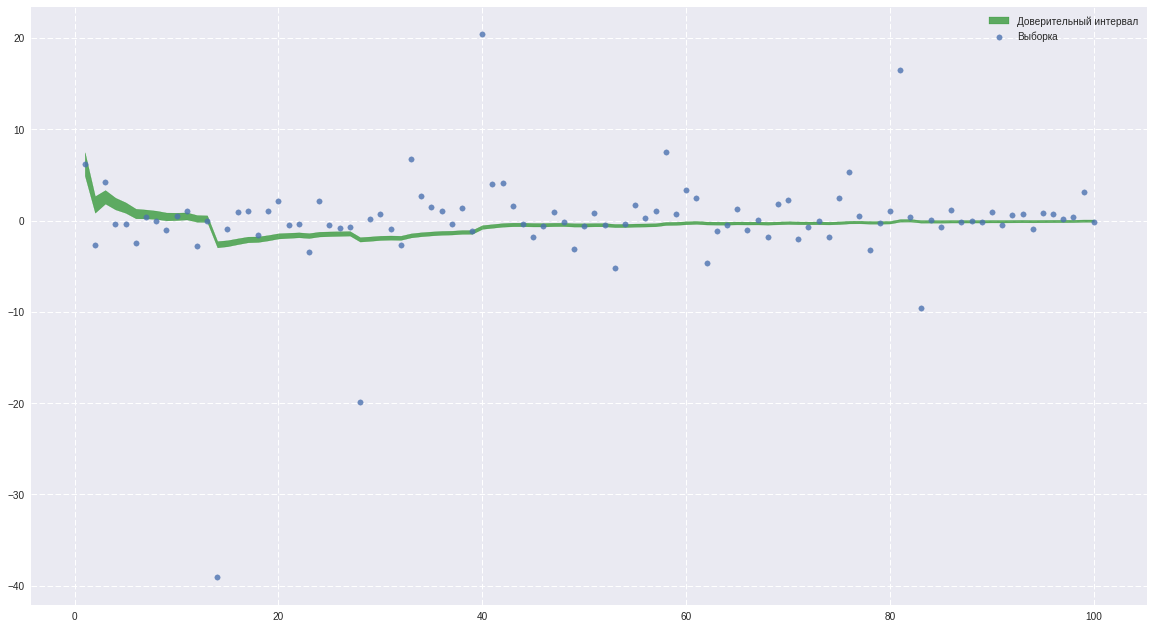

In [22]:
sample = sps.cauchy.rvs(size=100)
left = list(map(lambda n: np.mean(sample[:n]) - sps.norm.ppf((1 + alpha) / 2) / np.sqrt(n), 
                range(1, 101)))
right = list(map(lambda n: np.mean(sample[:n]) + sps.norm.ppf((1 + alpha) / 2) / np.sqrt(n), 
             range(1, 101)))
draw_confidence_interval(left, right, sample=sample, ylim=(-1, 1))

In [ ]:
Наиболее ровные ДИ получаются при нормальном и равномерном распределении. В случае стандартного распределения Коши ДИ 
выравниваются.

Задача 3. Сгенерируйте выборку размера 200 из распределения $\mathcal{N}((0, 0)^T, ((2, 1)^T, (1, 3)^T))$. Постройте точную доверительную область для $\theta$ в модели $\mathcal{N}(\theta, ((2, 1)^T, (1, 3)^T))$. Нанесите на график точки выборки.


Задача 2. 


В первом случае выборка из$\Gamma(3, 2)$; 
ДИ для $\theta$ в модели $\Gamma(\theta, \beta)$, причем $\beta$ неизвестно; точки выборки наносить на график не нужно. Сравните с интервалом для случая известного $\beta$.
ЦПТ в многомерном случае:
$$\left(\begin{pmatrix}
    \overline{X}   \\
    \overline{X^2} \\
\end{pmatrix} - \begin{pmatrix}
    \dfrac{\beta}{\theta}   \\
    \dfrac{\beta(\beta + 1)}{\theta^2} \\
\end{pmatrix} \right) \to \xi \sim \mathcal{N}(0, \Sigma)$$
Ковариации: $$ \Sigma(\theta, \beta) = \begin{pmatrix}
    \dfrac{\beta}{\theta^2}       &amp; \dfrac{\beta^3 + 2\beta^2}{\theta^3} \\
    \dfrac{\beta^3 + 2\beta^2}{\theta^3}       &amp; \dfrac{4\beta^3 + 10\beta^2 + 6\beta}{\theta^4} \\
\end{pmatrix} $$
Наследование асс норм функции:  $h(x, y) = \dfrac{x}{y - x^2}$. 
 $$\theta^* = \dfrac{\overline{X}}{S^2}$$$$\beta^* = \dfrac{\overline{x^2}}{S^2}$$
и $\overline{X}$, $\overline{X^2}$  - ас. нормальне оценки для $\dfrac{\beta}{\theta}$ и $\dfrac{\beta(\beta + 1)}{\theta^2}$ соответственно.

Получаем, что $h(\overline{X}, \ \overline{X^2})$ есть а.н.о. для $h(\dfrac{\beta}{\theta}, \ \dfrac{\beta(\beta + 1)}{\theta^2}) = \theta$ с а.д.:
$$\sigma^2 = \nabla h (\overline{X}, \ \overline{X^2})^T \sigma(\dfrac{\overline{X}}{S^2}, \ \dfrac{\overline{x^2}}{S^2}) \nabla h (\overline{X}, \ \overline{X^2})$$
Окончательно,
получаем ДИ $$ \left( h (\overline{X}, \ \overline{X^2}) - \dfrac{\sigma z_{\frac{1 + \alpha}{2}}}{\sqrt{n}}, h (\overline{X}, \ \overline{X^2}) + \dfrac{\sigma z_{\frac{1 + \alpha}{2}}}{\sqrt{n}} \right)$$


In [29]:
sample = sps.gamma(a=2, scale=1/3).rvs(size=100)
def cummean(s):
    return np.cumsum(s) / np.arange(1, len(s) + 1)
def S_sqr(s):
    return np.mean(s**2) - np.mean(s) ** 2
def cov_matrix(theta, beta):
    return np.array([
        [beta/theta**2, (beta**3 + 2*beta**2) / theta**3], 
        [(beta**3 + 2*beta**2) / theta**3, 
         (4*beta**3 + 10*beta**2 + 6*beta)/theta**4]
    ])
def grad_h(x, y):
    return np.array([
        (y + x**2)/(y - x**2)**2, -x/(y - x**2)**2 
    ])
cov_matrix(np.mean(sample) / S_sqr(sample), np.mean(sample ** 2) / S_sqr(sample))

array([[ 0.33065386,  1.74925751],
       [ 1.74925751,  2.68603343]])

In [30]:
def get_sigma(s):
    return grad_h(np.mean(s), np.mean(s**2)).T @ cov_matrix(np.mean(s) / S_sqr(s), np.mean(s ** 2) / S_sqr(s)) @ grad_h(np.mean(s), np.mean(s**2))
get_sigma(sample)

-442.13657036665785

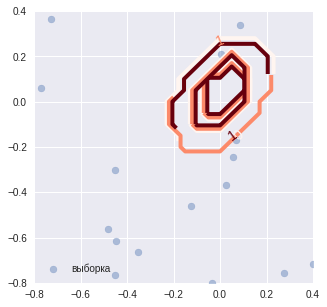

In [33]:
n = 200
alphas = [0.4, 0.6, 0.9]
cov = np.array([[2, 1], [1, 3]])
mean = np.array([0, 0])
sample = sps.multivariate_normal(mean, cov).rvs(size=n)
m_s = np.mean(sample, axis=0)
constant_cov = np.linalg.inv(cov)
cr = lambda mean, chi_2_ppf: n * (m_s - mean).T @ constant_cov @ (m_s - mean) < chi_2_ppf
grid = np.mgrid[-5:5:0.05, -5:5:0.05]
pos = np.empty(grid[0].shape + (2,))
pos[:, :, 0] = grid[0]; pos[:, :, 1] = grid[1]
plt.figure(figsize=(5, 5))
for alpha in alphas:
    chi_2_ppf = sps.chi2(df=2).ppf(alpha)
    conf_reg = np.array(list(map(lambda x, y: cr(np.array([x, y]), chi_2_ppf), 
                             grid[0].reshape(-1), grid[1].reshape(-1))))
    CS = plt.contour(grid[0], 
                     grid[1],
                     conf_reg.reshape(grid[0].shape), 
                     alphas, 
                     linewidths=4, 
                     cmap='Reds')
    plt.clabel(CS, 
               fontsize=14, 
               inline=1,
               fmt='%1.f',
               cmap='Set2')
plt.scatter(sample[:, 0], 
            sample[:, 1], 
            alpha=0.4, 
            label='выборка')
plt.xlim((-0.8, 0.4))
plt.ylim((-0.8, 0.4))
plt.legend()
plt.show()

**Задача 4.** 
При использовании асимптотических доверительных интервалов важно понимать, какой размер выборки является достаточным для хорошего приближения. Иначе говоря, пусть $\xi_n \xrightarrow{d} \mathcal{N}(0, 1)$. Начиная с какого $n$ распределение статистики $\xi_n$ хорошо приближается нормальным распределением?

Для ответа на этот вопрос проведите следующее исследование. Сгенерируйте $K=10^5$ выборок $(X_{i,k},\ i \leqslant N)$ размера $N=300$, где $k \leqslant K$ --- номер выборки. Для каждой подвыборки $k$-ой выборки $(X_{i,k},\ i \leqslant n)$ посчитайте значение статистики $T_{n,k}$ (определение далее) для всех $n \leqslant N$. Далее для каждого фиксированного $n$ постройте эмпирическую функцию распределения $F_n^*$ по выборке $(T_{n,k}, k \leqslant K)$ и посчитайте точное значение статистики $D_n = \sup\limits_{x \in \mathbb{R}} \left| F_n^*(x) - F(x) \right|,$ где $F$ --- функция распределения $\mathcal{N}(0, 1)$ (см. задачу 4 задания 1). Постройте график зависимости $D_n$ от $n$.

Рассмотрите следующие случаи
* $X_1, ..., X_n \sim \mathcal{N}(0, 1)$. Рассмотреть $T = \sqrt{n} \cdot \overline{X}$ и $T = \sqrt{n} \cdot \overline{X} \left/ \sqrt{S^2} \right.$.
* $X_1, ..., X_n \sim Bern(p), p = 0.5$. Рассмотреть $T = \sqrt{n} \frac{\overline{X} - p}{\sqrt{p(1-p)}}$ и $T_n = \sqrt{n} \frac{\overline{X} - p}{\sqrt{S^2}}$.
* $X_1, ..., X_n \sim Cauchy$. Рассмотреть $T = \sqrt{n} \frac{\widehat{\mu}}{\pi/2}$.

В первых двух пунктах нужно построить две зависимости на одном графике для сравнения. Масштаб графика должен быть таким, чтобы четко можно было увидеть различие между двумя статистиками. Например, поставьте ограничение сверху по оси $y$ на 0.05. Незабудьте добавить сетку и легенду.

Старайтесь не копировать много кода, пишите вспомогательные функции. Обратите внимание, что оптимальный код для первых двух пунктов выполняется за 30 секунд, для третьего --- за 3 минуты. Неоптимальный код может выполняться более часа.

Сделайте вывод о том, в каком случае распределение статистики быстрее приближается нормальным распределением. Начиная с какого размера выборки можно пользоваться приближением нормальным распределением?

In [34]:
def calc_Glivenko_for_one(sample, ecdf, cdf):
    sorted_sample = np.sort(sample)
    ecdf_values = np.hstack((0, ecdf(sorted_sample)))
    cdf_values = cdf(sorted_sample)
    return np.max(np.abs(np.hstack((cdf_values - ecdf_values[:len(sample)], cdf_values - ecdf_values[1:]))))

def calc_Glivenko_for_all(T_nk):
    ecdf_array = list(map(lambda sample: ECDF(sample), T_nk.T))
    D_n = np.array(list(map(lambda n: calc_Glivenko_for_one(T_nk.T[n], ecdf_array[n], sps.norm.cdf), 
                            np.arange(0, N))))
    return D_n

In [35]:
N, K = 300, 10**5
samples = sps.norm.rvs(size=(K, N))
arange = np.arange(1, N + 1)
T1 = lambda sample: np.cumsum(sample) / arange * np.sqrt(arange)
S_sqr = lambda sample: np.cumsum(sample ** 2) / arange - (np.cumsum(sample) / arange) ** 2
T2 = lambda sample: T1(sample) / np.sqrt(S_sqr(sample))
T1_nk = np.array(list(map(lambda sample: T1(sample), samples)))
T2_nk = np.array(list(map(lambda sample: T2(sample), samples)))



/home/nestyme/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in true_divide


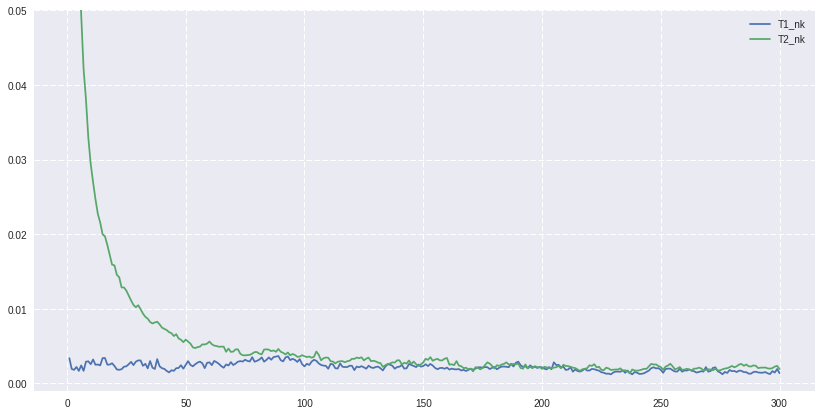

CPU times: user 23.1 s, sys: 136 ms, total: 23.3 s
Wall time: 23.3 s


In [36]:
%%time
plt.figure(figsize=(14, 7))
D1_n = calc_Glivenko_for_all(T1_nk)
D2_n = calc_Glivenko_for_all(T2_nk)
plt.plot(np.arange(1, N + 1), D1_n, label='T1_nk')
plt.plot(np.arange(1, N + 1), D2_n, label='T2_nk')
plt.ylim(-0.001, 0.05)
plt.legend(loc='best')
plt.grid(ls='--')
plt.show()

In [37]:
p = 0.5
N, K = 300, 10**5
samples = sps.bernoulli(p).rvs(size=(K, N))
arange = np.arange(1, N + 1)
cummean = lambda sample: np.cumsum(sample) / arange
T1 = lambda sample: np.sqrt(arange) * (cummean(sample) - p) / np.sqrt(p * (1 - p))
S_sqr = lambda sample: np.cumsum(sample ** 2) / arange - (np.cumsum(sample) / arange) ** 2
T2 = lambda sample: np.sqrt(arange) * (cummean(sample) - p) / np.sqrt(S_sqr(sample))
T1_nk = np.array(list(map(lambda sample: T1(sample), samples)))
T2_nk = np.array(list(map(lambda sample: T2(sample), samples)))


/home/nestyme/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in true_divide


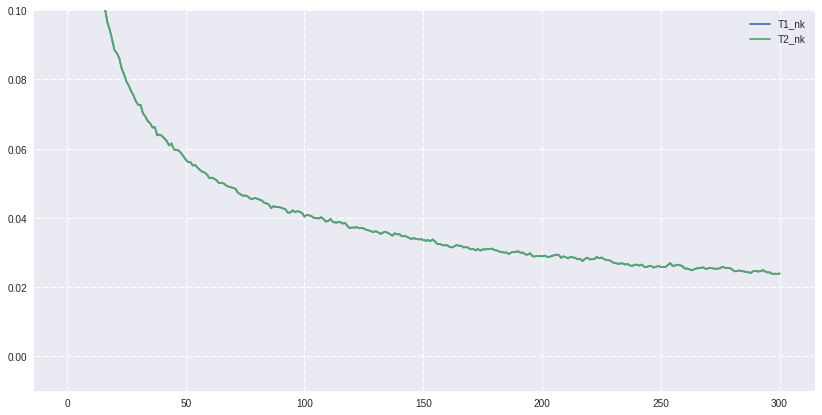

CPU times: user 21.2 s, sys: 168 ms, total: 21.4 s
Wall time: 21.4 s


In [38]:

%%time
plt.figure(figsize=(14, 7))
D1_n = calc_Glivenko_for_all(T1_nk)
D2_n = calc_Glivenko_for_all(T2_nk)
plt.plot(np.arange(1, N + 1), D1_n, label='T1_nk')
plt.plot(np.arange(1, N + 1), D2_n, label='T2_nk')
plt.legend(loc='best')
plt.ylim(-0.01, 0.1)
plt.grid(ls='--')
plt.show()

In [88]:
%%time
N, K = 300, 10**5
samples = sps.cauchy.rvs(size=(K, N))
arange = np.arange(1, N + 1)

CPU times: user 2.4 s, sys: 440 ms, total: 2.84 s
Wall time: 9.15 s


In [39]:

%%time
T_nk = np.array(list(map(lambda n: np.sqrt(n) * np.median(samples[:, :n], axis=1) / (np.pi / 2), range(1, N + 1))))

CPU times: user 1min 3s, sys: 3.62 s, total: 1min 7s
Wall time: 1min 7s


/home/nestyme/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:326: UserWarning: Unrecognized location "наиболее подходящий". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  six.iterkeys(self.codes))))


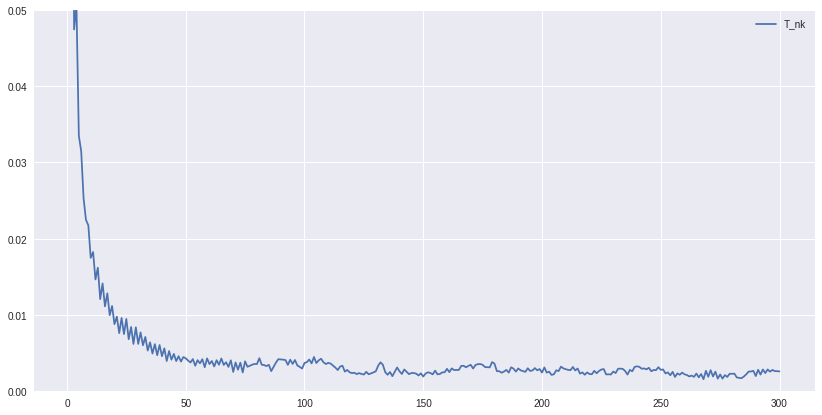

In [90]:
plt.figure(figsize=(14, 7))
D_n = calc_Glivenko_for_all(T_nk.T)
plt.plot(np.arange(1, N + 1), D_n, label='T_nk')
plt.legend(loc='наиболее подходящий')
plt.ylim(-0.00, 0.05)
plt.show()

**Задача 6.** 
Реализуйте следующую функцию для выборки из нормального распределения

In [32]:
def normal_summary(sample):
    size = len(sample)
    sample_mean = np.mean(sample)
    sample_meadian = np.median(sample)
    sample_std = np.std(sample)
    left = sample_mean - sps.t(df=size - 1).ppf(1 - alpha / 2) * sample_std / np.sqrt(size)
    right = sample_mean + sps.t(df=size - 1).ppf(1 - alpha / 2) * sample_std / np.sqrt(size)
    confidence_interval = (left, right)
    kstest = sps.kstest(sample, sps.norm(loc=sample_mean, scale=sample_std).cdf)
    print('size: %d' %size)
    print('sample mean: %.2f' % sample_mean)
    print('sample median: %.2f' % sample_meadian)
    print('sample std: %.2f' % sample_std)  # стандартное отклонение = корень из дисперсии
    print('0.95 confidence interval: (%.2f, %.2f)' % confidence_interval)
    print('KS-stat: %.3f' % kstest.statistic)  # значение статистики из теоремы Колмогорова-Смирнова,
                                  # взяв в качестве F функцию распределения нормального
                                  # распределения с оцененными выше параметрами
    return size, sample_mean, sample_meadian, sample_std, confidence_interval, kstest

In [94]:

normal_summary(sps.norm(loc=3, scale=5).rvs(size=10))

size: 10
sample mean: 4.38
sample median: 4.07
sample std: 2.92
0.95 confidence interval: (4.20, 4.56)
KS-stat: 0.157


(10,
 4.3778194444992788,
 4.0704138834321535,
 2.9157178795749217,
 (4.1983583166674299, 4.5572805723311278),
 KstestResult(statistic=0.15688203849201943, pvalue=0.96638207668314546))

### 2. Байесовские методы

**Задача 7.** Пусть $X_1, ..., X_n \sim \mathcal{N}(\theta, 1)$ и $\theta$ имеет априорное распределение Коши. Как было сказано на лекции, аналитически интеграл в знаменателе формулы Байеса посчитать не удастся. Однако, поскольку в данном случае параметр один, можно его посчитать с помощью приближенного интегрирования.

В качестве метода приближенного интегрирования можно использовать следующую можификацию известного метода Монте-Карло. В качестве оценки интеграла $\int\limits_{\mathbb{R}} f(x) p(x) dx$, где $p(x)$ --- некоторая плотность, можно взять величину $\sum\limits_{j=1}^k f(Y_i)$, где $Y_1, ..., Y_k$ --- сгенерированная выборка из распределения, имеющего плотность $p(x)$.

Сгенерируйте выборку размера 5 из стандартного нормального распределения. Посчитайте для нее $c$ --- знаменатель в формуле Байеса. Какой размер вспомогательной выборки в методе приближенного интегрирования необходим, чтобы с большой точностью посчитать значение $c$?

Нарисуйте график плотности апостериорного распределения. Посчитайте математическое ожидание по апостериорному распределению.

(0, 0.002)

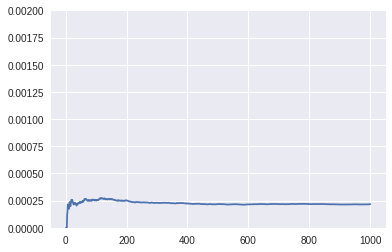

In [96]:

sample_normal = sps.norm.rvs(size=5)
f = lambda t: 1/ (2 * np.pi) ** (len(sample_normal) / 2) * np.exp(-1/2 * np.sum((sample_normal - t) ** 2))
n = 1000
help_sample = sps.cauchy.rvs(size=n)
np_f = np.vectorize(f)
solve_integral = np.cumsum(np_f(help_sample)) / np.arange(1, n + 1)
plt.plot(np.arange(1, n + 1), solve_integral)
plt.ylim(0, 0.002)

**Задача 8.** Рассмотрим схему испытаний Бернулли (т.е. броски монет) с вероятностью успеха $p$. 

Постройте несколько графиков сопряженного распределения для разных параметров и охарактеризуйте, как значения параметров его соотносятся с априорными знаниями о монете.
Это могут быть, например, знания вида 
* монета скорее честная (при таком априорном распределении наиболее вероятны значения $p$ в окрестности 0.5)
* монета скорее нечестная, перевес неизвестен (наименее вероятны значения $p$ в окрестности 0.5)
* монета скорее нечестная, перевес в сторону герба (наиболее вероятны значения $p$ в окрестности 1)
* монета скорее честная, либо с небольшим перекосом вправо (наиболее вероятны значения $p$ в окрестности ~0.6)
* ничего не известно (все значения равновероятны)

Для каждого случая из перечисленных выше постройте график плотности сопряженного распределения (на одной фигуре).

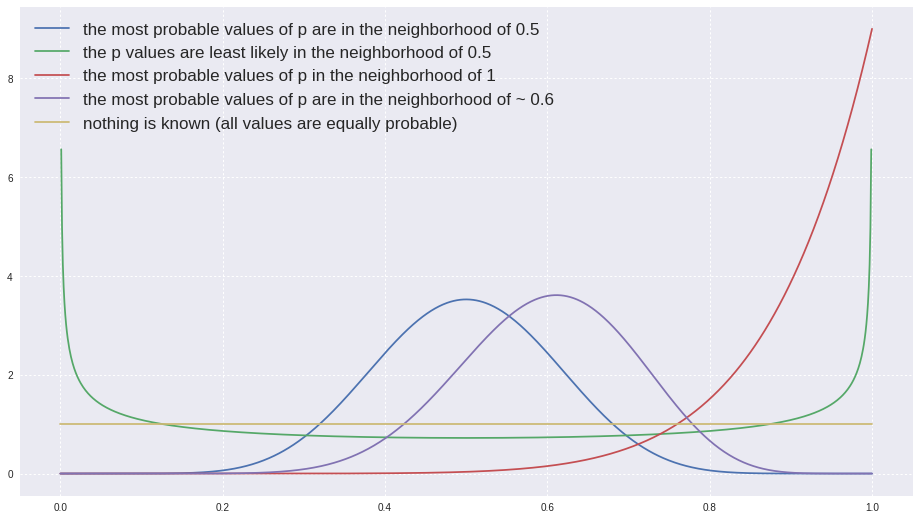

In [87]:
plt.figure(figsize=(16, 9))
x = np.linspace(0, 1, 1000)
plt.plot (x, sps.beta (a = 10, b = 10) .pdf (x), label = 'the most probable values of p are in the neighborhood of 0.5')
plt.plot (x, sps.beta (a = 0.6, b = 0.6) .pdf (x), label = 'the p values are least likely in the neighborhood of 0.5')
plt.plot (x, sps.beta (a = 9, b = 1) .pdf (x), label = 'the most probable values of p in the neighborhood of 1')
plt.plot (x, sps.beta (a = 12, b = 8) .pdf (x), label = 'the most probable values of p are in the neighborhood of ~ 0.6')
plt.plot (x, sps.beta (a = 1, b = 1) .pdf (x), label = 'nothing is known (all values are equally probable)')
plt.grid(ls=':')
plt.legend(loc='best', fontsize=17)
plt.show()
def draw_posteriori(grid, distr_class, post_params, xlim=None):
    size = post_params.shape[0] - 1
    
    plt.figure(figsize=(12, 7))
    for n in range(size+1):
        plt.plot(grid, 
                 distr_class(post_params[n]).pdf(grid) if np.isscalar(post_params[n]) 
                 else distr_class(*post_params[n]).pdf(grid), 
                 lw=2.7,
                 color=(1-n/size,
                        n/size, 
                        0))
    plt.grid(ls='--')
    plt.legend()
    plt.xlim(xlim)
    plt.show()
    

def draw_estimations(ml, distr_class, post_params, confint=True, ylim=None):
    size = len(ml)
    distrs = []
    for n in range(size+1): 
        distrs.append(distr_class(post_params[n]) if np.isscalar(post_params[n]) 
                      else distr_class(*post_params[n]))
    
    plt.figure(figsize=(12, 4))
    plt.plot(np.arange(size+1), [d.mean() for d in distrs], label='Bayes', lw=1.5)
    plt.fill_between(np.arange(size+1), [d.ppf(0.975) for d in distrs], 
                     [d.ppf(0.025) for d in distrs], alpha=0.1)
    plt.plot(np.arange(size)+1, ml, label='ML', lw=1.5)
    plt.grid(ls='---')
    plt.ylim(ylim)
    plt.legend()
    plt.show()


Ниже приведена реализация некоторых вспомогательных функций.

In [89]:
def draw_posteriori(grid, distr_class, post_params, xlim=None):
    size = post_params.shape[0] - 1
    
    plt.figure(figsize=(12, 7))
    for n in range(size+1):
        plt.plot(grid, 
                 distr_class(post_params[n]).pdf(grid) if np.isscalar(post_params[n]) 
                 else distr_class(*post_params[n]).pdf(grid), 
                 label='n={}: {}'.format(n, post_params[n]), 
                 lw=2.5,
                 color=(1-n/size, n/size, 0))
    plt.grid(ls=':')
    plt.legend()
    plt.xlim(xlim)
    plt.show()
    

def draw_estimations(ml, distr_class, post_params, confint=True, ylim=None):
    
    size = len(ml)
    distrs = []
    for n in range(size+1): 
        distrs.append(distr_class(post_params[n]) if np.isscalar(post_params[n]) 
                      else distr_class(*post_params[n]))
    
    plt.figure(figsize=(8, 4))
    plt.plot(np.arange(size+1), [d.mean() for d in distrs], label='Байес', lw=2)
    plt.fill_between(np.arange(size+1), [d.ppf(0.975) for d in distrs], 
                     [d.ppf(0.025) for d in distrs], alpha=0.1)
    plt.plot(np.arange(size)+1, ml, label='ML', lw=1.5)
    plt.grid(ls='-')
    plt.ylim(ylim)
    plt.legend()
    plt.show()
def bern_posterior_params(sample, a, b):
    params = np.array(list(map(lambda n: np.array([a + np.sum(sample[:n]), 
                                                b + len(sample[:n]) - np.sum(sample[:n])]), 
                                                range(len(sample)+1))))
    return params

Симметричная монета, верные параметры

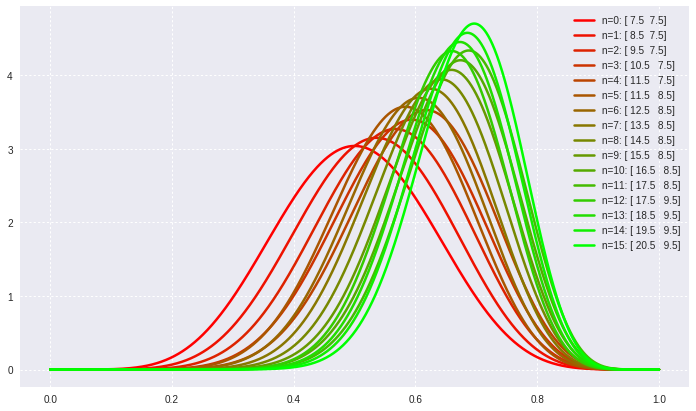

In [62]:
sample = sps.bernoulli(0.5).rvs(15)
grid = np.linspace(0, 1, 1500)
draw_posteriori(grid, sps.beta, bern_posterior_params(sample, 15/2, 15/2))
likelihood = np.cumsum(sample) / np.arange(1, len(sample) + 1)

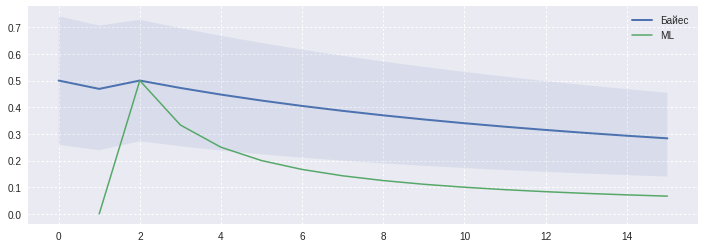

In [61]:
draw_estimations(ml=likelihood, 
                 distr_class=sps.beta,
                 post_params=bern_posterior_params(sample, 15/2, 15/2)
                )

Симметричная монета, параметры подобраны неправильно

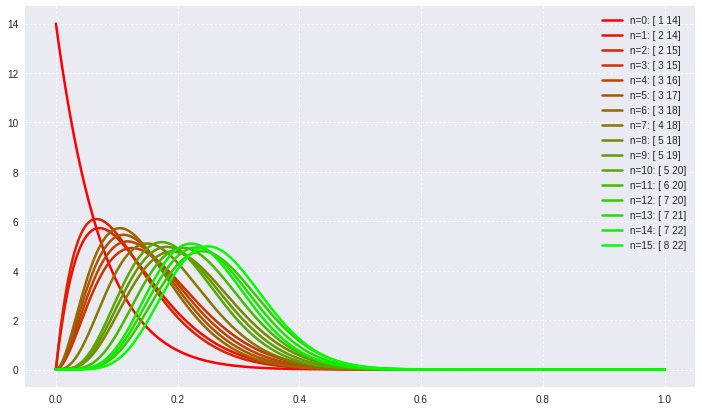

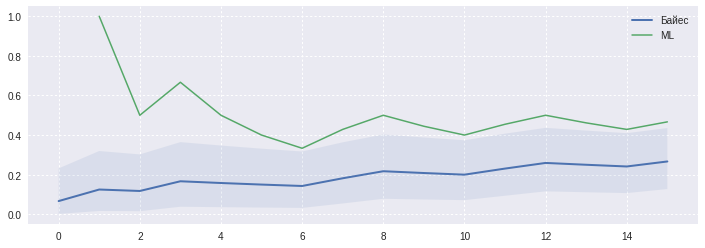

In [63]:

sample = sps.bernoulli(0.5).rvs(15)
grid = np.linspace(0, 1, 1000)
draw_posteriori(grid, sps.beta, bern_posterior_params(sample, 1, 14))
likelihood = np.cumsum(sample) / np.arange(1, len(sample) + 1)
draw_estimations(ml=likelihood, distr_class=sps.beta, post_params=bern_posterior_params(sample, 1, 14))

Проведите по 15 бросков симметричной и несимметричной монет (можно сгенерировать) и рассмотрите для каждой из них два случая --- параметры априорного распределения подобраны правильно или неправильно.
Постройте графики, воспользовавшись функциями `draw_posteriori` и `draw_estimations`.

Сделайте вывод. Что можно сказать про зависимость от параметров априорного распределения? Сравните байесовские оценки с оценкой максимального правдоподобия.

In [ ]:
Несимметричная монета, параметры подобраны правильно

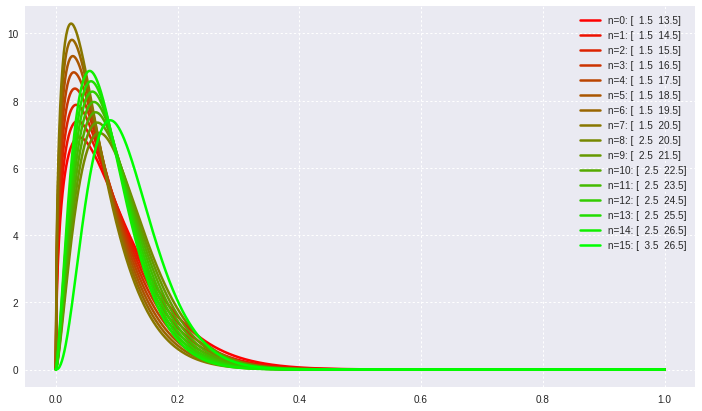

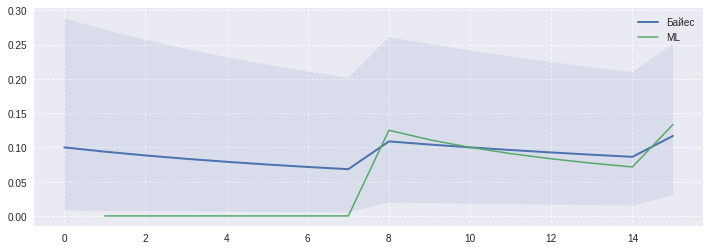

In [64]:
sample = sps.bernoulli(0.1).rvs(15)
grid = np.linspace(0, 1, 1000)
draw_posteriori(grid, sps.beta, bern_posterior_params(sample, 0.1 * 15, 0.9 * 15))
likelihood = np.cumsum(sample) / np.arange(1, len(sample) + 1)
draw_estimations(ml=likelihood, distr_class=sps.beta, post_params=bern_posterior_params(sample, 0.1 * 15, 0.9 * 15))

Несимметричная монета, параметры подобраны неправильно

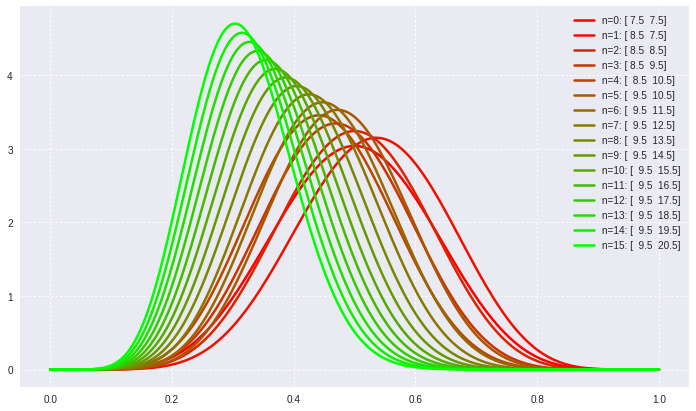

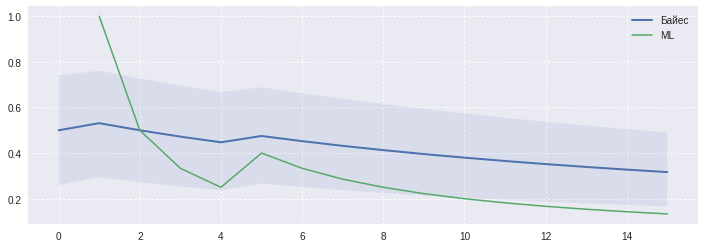

In [66]:
sample_simmetr = sps.bernoulli(0.1).rvs(15)
grid = np.linspace(0, 1, 1015)
draw_posteriori(grid, sps.beta, bern_posterior_params(sample_simmetr, 7.5, 7.5))
likelihood = np.cumsum(sample_simmetr) / np.arange(1, len(sample_simmetr) + 1)
draw_estimations(ml=likelihood, distr_class=sps.beta, post_params=bern_posterior_params(sample_simmetr, 7.5, 7.5))

**Задача 9<font size="5" color="red">\*</font>.** 
Один экзаменатор на экзамене по теории вероятностей при выставлении оценки студенту пользуется следующей схемой. В течении экзамена экзаменатор задает студенту некоторое количество вопросов, получая тем самым выборку $X_1, ..., X_n \sim Bern(p)$ --- индикаторы того, что студент на вопрос ответил правильно.
При этом сначала он подбирает некоторое априорное распределение на основе его знаний о студенте к моменту начала ответа. После каждого ответа студента экзаменатор вычисляет апостериорное распределение и строит байесовский доверительный интервал для $p$ уровня доверия 0.95. Если после очередного ответа студента доверительный интервал содержит лишь одно число $i/10$, где $i \in \{0, ..., 10\}$, то экзаменатор выставляет студенту оценку $i+1$.

Ответьте на следующие вопросы:
* Квантили какого уровня нужно выбирать экзаменатору при построении доверительного интервала, чтобы задавать студенту как можно меньше вопросов? Какие оценки будет выставлять экзаменатор в таком случае?
* Как зависит оценка студента и среднее количество заданных вопросов у различных студентов (по уровню знаний) при различных априорных представлений экзаметора?
* Нужно ли дружить с таким экзаменатором?

**Задача 10.** Проведите исследование, аналогичное задаче 8 для выборок из распределений
* $\mathcal{N}(\theta, 1)$
* $Exp(\theta)$

* $\mathcal{N}(\theta, 1)$


In [ ]:
Параметры подобраны удачно

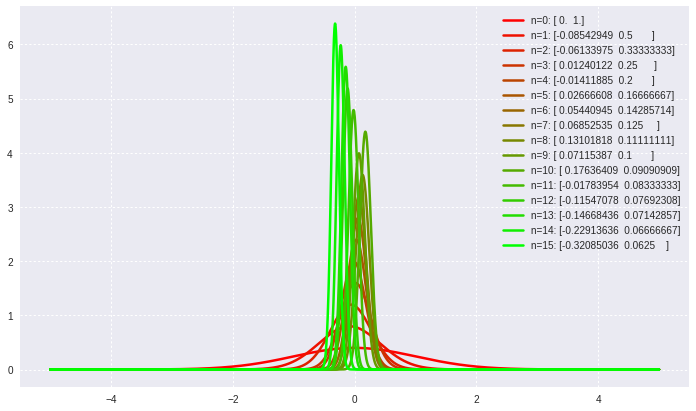

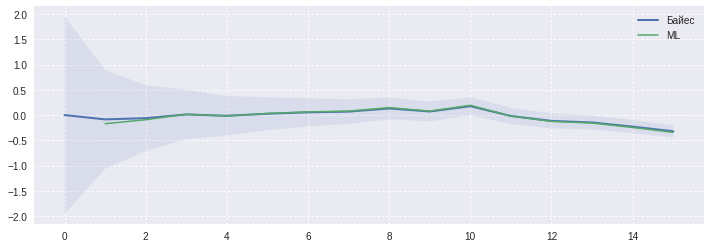

In [78]:
def npostpar(sample, mu_0, sigma_0):
    params = np.array(list(map(lambda n: np.array([mu_0 + np.sum(sample[:n]) / (1 + n * sigma_0 ** 2), 
                                                   sigma_0 ** 2 / (1 + n * sigma_0 ** 2)]), 
                                          range(len(sample)+1))))
    return params
sample = sps.norm.rvs(size=15)
grid = np.linspace(-5, 5, 10000)
draw_posteriori(grid, sps.norm, npostpar(sample, 0, 1))
likelihood = np.cumsum(sample) / np.arange(1, len(sample) + 1)
draw_estimations(ml=likelihood, distr_class=sps.norm, post_params=npostpar(sample, 0, 1))

In [ ]:
Параметры подобраны плохо

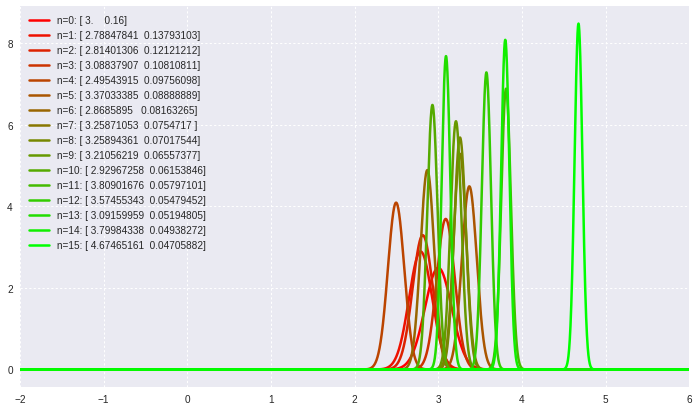

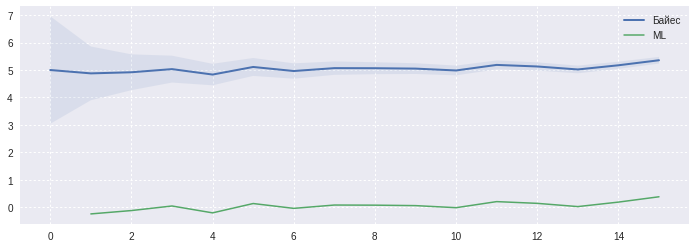

In [74]:

sample = sps.norm.rvs(size=15)
grid = np.linspace(-8, 8, 10000)
draw_posteriori(grid, sps.norm, npostpar(sample, 3, 0.4), xlim=(-2, 6))
likelihood = np.cumsum(sample) / np.arange(1, len(sample) + 1)
draw_estimations(ml=likelihood, distr_class=sps.norm, post_params=npostpar(sample, 5, 1))


* $Exp(\theta)$
аналогично, графики:
1) хорошо подобранные параметры
2) плохо подобранные параметры

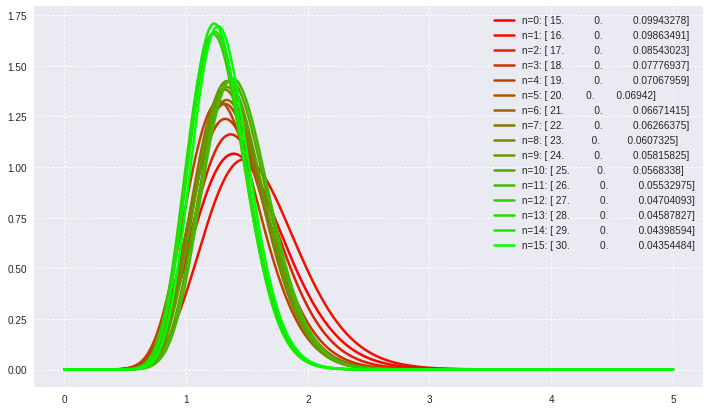

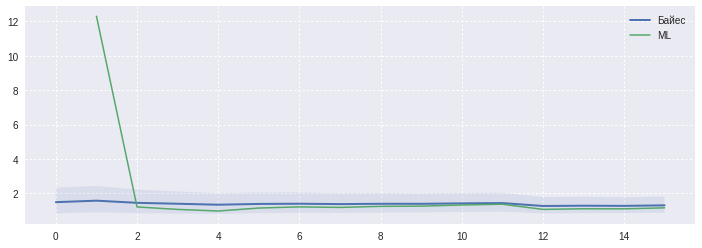

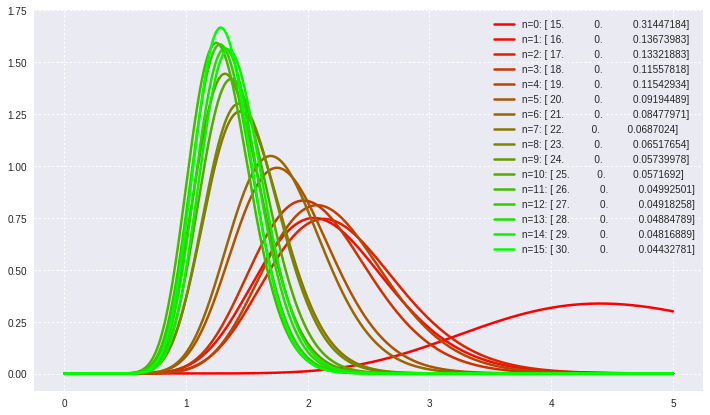

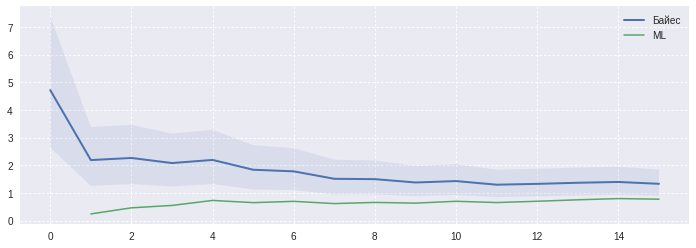

In [79]:
def postpar(sample, a, b):
    params = np.array(list(map(lambda n: np.array([b + n, 0, 1/(a + np.sum(sample[:n]))]), 
                                          range(len(sample)+1))))
    return params
sample = sps.expon.rvs(size=15)
grid = np.linspace(0, 5, 1000)
help_sample = sps.expon.rvs(size=15)
draw_posteriori(grid, sps.gamma, exp_posterior_params(sample, np.sum(help_sample), 15))
likelihood = np.arange(1, len(sample) + 1) / np.cumsum(sample)
draw_estimations(ml=likelihood, distr_class=sps.gamma, 
                 post_params=exp_posterior_params(sample, np.sum(help_sample), 15))
sample = sps.expon.rvs(size=15)
grid = np.linspace(0, 5, 1000)
help_sample = sps.expon(scale=1/4).rvs(size=15)
draw_posteriori(grid, sps.gamma, exp_posterior_params(sample, np.sum(help_sample), 15))
likelihood = np.arange(1, len(sample) + 1) / np.cumsum(sample)
draw_estimations(ml=likelihood, distr_class=sps.gamma, 
                 post_params=exp_posterior_params(sample, np.sum(help_sample), 15))

Вывод( для задач 8 и 10): Убедились в применимости Байесовского метода на выборках и потренировались подбирать гиперпараметры априорного распределения 

**Задача 11<font size="5" color="red">\*</font>.** Проведите исследование, аналогичное задаче 8 для выборки из распределения $\mathcal{N}(\theta_1, \theta_2^{-1})$.
